In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import time
import numpy as np

from tensorflow.keras.layers import Rescaling
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras import models, layers, Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model

In [2]:
TRAIN_DATA_PATH = os.path.join("./dataset/train")
TEST_DATA_PATH = os.path.join("./dataset/test")
EPOCHS = 30
RANDOM_SEED = 42
BATCH_SIZE = 32
IMG_SIZE = (48,48)

In [3]:
# one hot encoding (categorical lbl mode)
train_dataset = image_dataset_from_directory(
    TRAIN_DATA_PATH,
    validation_split=0.2,
    subset="training",
    seed = RANDOM_SEED,
    image_size=IMG_SIZE,
    color_mode="grayscale",
    batch_size=BATCH_SIZE,
    label_mode = "categorical" 
)

val_dataset = image_dataset_from_directory(
    TRAIN_DATA_PATH,
    validation_split=0.2,
    subset="validation",
    seed = RANDOM_SEED,
    image_size=IMG_SIZE,
    color_mode="grayscale",
    batch_size=BATCH_SIZE,
    label_mode = "categorical" 
)

test_dataset = image_dataset_from_directory(
    TEST_DATA_PATH,
    image_size=IMG_SIZE,
    color_mode="grayscale",
    batch_size=BATCH_SIZE,
    label_mode = "categorical" 
)

Found 28709 files belonging to 7 classes.
Using 22968 files for training.
Found 28709 files belonging to 7 classes.
Using 5741 files for validation.
Found 7178 files belonging to 7 classes.


In [4]:
# CNN works better with 0-1 px values
layer_normalization = Rescaling(1./255)

train_dataset = train_dataset.map(lambda x, y: (layer_normalization(x), y))
val_dataset = val_dataset.map(lambda x, y: (layer_normalization(x),y))
test_dataset = test_dataset.map(lambda x, y: (layer_normalization(x),y))

In [5]:
data_augmentation = Sequential([
    layers.RandomFlip('horizontal'),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])

In [6]:
model = models.Sequential([
    layers.Conv2D(64, 3, data_format="channels_last", input_shape = (48,48,1)),
    data_augmentation,
    layers.BatchNormalization(),
    layers.Activation('relu'),

    layers.Conv2D(64,3),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPool2D(pool_size=(2,2), strides=2),
    layers.Dropout(0.3),

    layers.Conv2D(32,3),
    layers.BatchNormalization(),
    layers.Activation('relu'),

    layers.Conv2D(32,3),
    layers.BatchNormalization(),
    layers.Activation('relu'),

    layers.Conv2D(32,3),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPool2D(pool_size=(2,2), strides=2),
    layers.Dropout(0.3),

    layers.Flatten(),
    layers.Dense(128),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dropout(0.3),

    layers.Dense(7),
    layers.Activation('softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

c:\Users\User\anaconda3\envs\cuda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential (Sequential)         │ (None, 46, 46, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 46, 46, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 46, 46, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 44, 44, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 44, 44, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 44, 44, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 20, 20, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 20, 20, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 20, 20, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 18, 18, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 18, 18, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 18, 18, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 16, 16, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 339,111 (1.29 MB)

 Trainable params: 338,407 (1.29 MB)

 Non-trainable params: 704 (2.75 KB)

In [7]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [8]:
start = time.time()
history = model.fit(
    train_dataset,
    validation_data = val_dataset,
    epochs=EPOCHS,
    callbacks = [early_stop]
)
end = time.time()

print("Training time: ", (end - start)/60)

Epoch 1/30
718/718 ━━━━━━━━━━━━━━━━━━━━ 65s 88ms/step - accuracy: 0.2802 - loss: 1.8212 - val_accuracy: 0.3571 - val_loss: 1.6122
Epoch 2/30
718/718 ━━━━━━━━━━━━━━━━━━━━ 66s 91ms/step - accuracy: 0.3739 - loss: 1.5991 - val_accuracy: 0.3609 - val_loss: 1.6055
Epoch 3/30
718/718 ━━━━━━━━━━━━━━━━━━━━ 66s 92ms/step - accuracy: 0.4298 - loss: 1.4795 - val_accuracy: 0.3367 - val_loss: 1.6734
Epoch 4/30
718/718 ━━━━━━━━━━━━━━━━━━━━ 67s 94ms/step - accuracy: 0.4500 - loss: 1.4241 - val_accuracy: 0.4386 - val_loss: 1.4506
Epoch 5/30
718/718 ━━━━━━━━━━━━━━━━━━━━ 66s 92ms/step - accuracy: 0.4651 - loss: 1.3895 - val_accuracy: 0.3663 - val_loss: 1.5912
Epoch 6/30
718/718 ━━━━━━━━━━━━━━━━━━━━ 64s 88ms/step - accuracy: 0.4791 - loss: 1.3516 - val_accuracy: 0.4809 - val_loss: 1.3403
Epoch 7/30
718/718 ━━━━━━━━━━━━━━━━━━━━ 64s 88ms/step - accuracy: 0.4885 - loss: 1.3339 - val_accuracy: 0.5212 - val_loss: 1.2468
Epoch 8/30
718/718 ━━━━━━━━━━━━━━━━━━━━ 66s 92ms/step - accuracy: 0.4976 - loss: 1.3093 - 

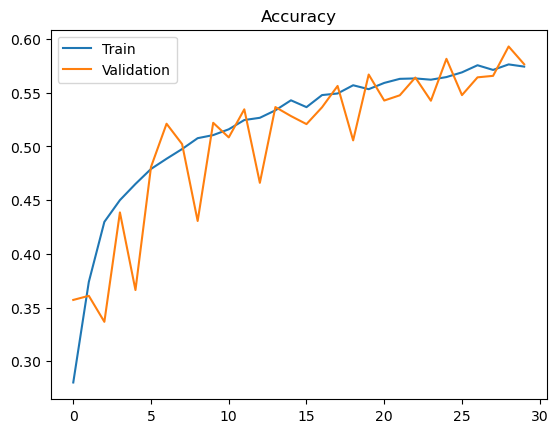

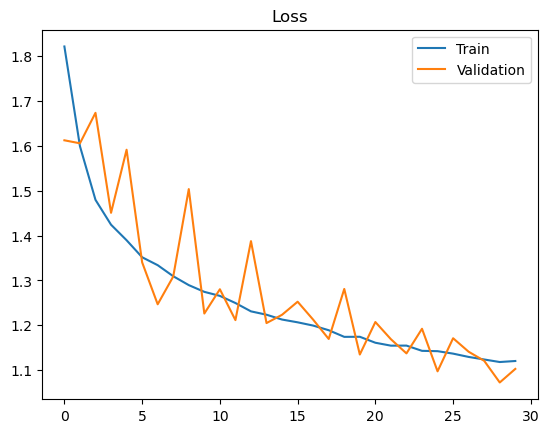

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy")
plt.legend(['Train','Validation'])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Loss")
plt.legend(['Train','Validation'])
plt.show()

In [13]:
test_loss, test_acc = model.evaluate(test_dataset)
print("Test Accuracy: ", test_acc)

225/225 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.5836 - loss: 1.0802
Test Accuracy:  0.583588719367981


In [15]:
model.save('FER_own.h5')

In [16]:
model = tf.keras.models.load_model('FER_own.h5')

In [ ]:
## Load grayscale image and convert to RGB (3 channels)
# gray_img = cv2.imread('gray.png', cv2.IMREAD_GRAYSCALE)
# rgb_img = cv2.cvtColor(gray_img, cv2.COLOR_GRAY2RGB)